In [1]:
import pandas as pd

# ---- 路径：改成你的实际路径 ----
file_path = "/Users/muyuanchen/Desktop/NIH_research/Nat2018PublicUS.c20190509.r20190717.txt"

# =====================================================================
# 1-based（包含右端） → 0-based 半开区间 (start-1, end)
# 已含之前所有页到 ILLB_R，并修正 ILLB_R；再新增本页 5 个变量
# 同时修正：MRACE6 仅 1 位；MRACE31 列名拼写
# =====================================================================
colspecs = [
    # 出生基本信息
    (8, 12),    # DOB_YY  (9–12)
    (12, 14),   # DOB_MM  (13–14)
    (18, 22),   # DOB_TT  (19–22)
    (22, 23),   # DOB_WK  (23)
    (31, 32),   # BFACIL  (32)
    (49, 50),   # BFACIL3 (50)

    # 母亲年龄
    (72, 73),   # MAGE_IMPFLG (73)
    (73, 74),   # MAGE_REPFLG (74)
    (74, 76),   # MAGER      (75–76)
    (76, 78),   # MAGER14    (77–78)
    (78, 79),   # MAGER9     (79)

    # 母亲国籍/居住/种族
    (83, 84),   # MBSTATE_REC (84)
    (103,104),  # RESTATUS    (104)
    (104,106),  # MRACE31     (105–106)
    (106,107),  # MRACE6      (107)
    (108,110),  # MRACE15     (108–109)
    (109,110),  # MBRACE      (110)
    (110,111),  # MRACEIMP    (111)

    # 母亲族裔
    (111,112),  # MHISPX    (112)
    (114,115),  # MHISP_R   (115)
    (115,116),  # F_MHISP   (116)
    (116,117),  # MRACEHISP (117)

    # 婚姻状况 / 父系报告
    (118,119),  # MAR_P   (119)
    (119,120),  # DMAR    (120)
    (120,121),  # MAR_IMP (121)
    (122,123),  # F_MAR_P (123)

    # 教育（母/父）
    (123,124),  # MEDUC      (124)
    (125,126),  # F_MEDUC    (126)
    (141,142),  # FAGERPT_FLG (142)
    (146,148),  # FAGECOMB    (147–148)
    (148,150),  # FAGEREC11   (149–150)
    (150,152),  # FRACE31     (151–152)
    (152,153),  # FRACE6      (153)
    (153,155),  # FRACE15     (154–155)
    (158,159),  # FHISPX      (159)
    (159,160),  # FHISP_R     (160)
    (160,161),  # F_FHISP     (161)
    (161,162),  # FRACEHISP   (162)
    (162,163),  # FEDUC       (163)
    (164,165),  # F_FEDUC     (165)

    # 既往妊娠史
    (170,172),  # PRIORLIVE (171–172)
    (172,174),  # PRIORDEAD (173–174)
    (174,176),  # PRIORTERM (175–176)
    (178,179),  # LBO_REC   (179)
    (181,182),  # TBO_REC   (182)

    # 间隔 Recode
    (197,200),  # ILLB_R   (198–200)
    (200,202),  # ILLB_R11 (201–202)
    (205,208),  # ILOP_R   (206–208)
    (208,210),  # ILOP_R11 (209–210)
    (213,216),  # ILP_R    (214–216)
    (216,218),  # ILP_R11  (217–218)

    # 产前检查
    (223,225),  # PRECARE    (224–225)
    (225,226),  # F_MPCB     (226)
    (226,227),  # PRECARE5   (227)
    (237,239),  # PREVIS     (238–239)
    (241,243),  # PREVIS_REC (242–243)
    (243,244),  # F_TPCV     (244)

    # WIC & 吸烟
    (250,251),  # WIC     (251)
    (251,252),  # F_WIC   (252)
    (252,254),  # CIG_0   (253–254)
    (254,256),  # CIG_1   (255–256)
    (256,258),  # CIG_2   (257–258)
    (258,260),  # CIG_3   (259–260)
    (260,261),  # CIG0_R  (261)
    (261,262),  # CIG1_R  (262)
    (262,263),  # CIG2_R  (263)
    (263,264),  # CIG3_R  (264)
    (264,265),  # F_CIGS_0 (265)
    (265,266),  # F_CIGS_1 (266)
    (266,267),  # F_CIGS_2 (267)
    (267,268),  # F_CIGS_3 (268)
    (268,269),  # CIG_REC  (269)
    (269,270),  # F_TOBACO (270)

    # 母亲身高 / BMI
    (279,281),  # M_HT_IN (280–281)
    (281,282),  # F_M_HT  (282)
    (282,286),  # BMI     (283–286)
    (286,287),  # BMI_R     (287) Body Mass Index Recode
    # 288–291 FILLER 跳过
    (291,294),  # PWGT_R    (292–294) Pre-pregnancy Weight Recode
    (294,295),  # F_PWGT    (295) Reporting Flag for Pre-pregnancy Weight
    # 296–298 FILLER 跳过
    (298,301),  # DWGT_R    (299–301) Delivery Weight Recode
    # 302 FILLER 跳过
    (302,303),  # F_DWGT    (303) Reporting Flag for Delivery Weight
    (303,305),  # WTGAIN    (304–305) Weight Gain
    (305,306),  # WTGAIN_REC (306) Weight Gain Recode
    (306,307),  # F_WTGAIN  (307) Reporting Flag for Weight Gain
    # 308–312 FILLER 跳过
    (312,313),  # RF_PDIAB   (313) Pre-pregnancy Diabetes
    (313,314),  # RF_GDIAB   (314) Gestational Diabetes
    (314,315),  # RF_PHYPE   (315) Pre-pregnancy Hypertension
    (315,316),  # RF_GHYPE   (316) Gestational Hypertension
    (316,317),  # RF_EHYPE   (317) Hypertension Eclampsia
    (317,318),  # RF_PPTTERM (318) Previous Preterm Birth
    (318,319),  # F_RF_PDIAB (319) Reporting Flag for Pre-pregnancy Diabetes
    (319,320),  # F_RF_GDIAB (320) Reporting Flag for Gestational Diabetes
    (320,321),  # F_RF_PHYPER (321) Reporting Flag for Pre-pregnancy Hypertension
    (321,322),  # F_RF_GHYPER (322) Reporting Flag for Gestational Hypertension
    (322,323),  # F_RF_ECLAMP (323) Reporting Flag for Hypertension Eclampsia
    (323,324),  # F_RF_PPB   (324) Reporting Flag for Previous Preterm Birth
    (324,325),  # RF_INFTR   (325) Infertility Treatment Used
    (325,326),  # RF_FEDRG    (326) Fertility Enhancing Drugs
    (326,327),  # RF_ARTEC    (327) Assisted Reproductive Technology
    (327,328),  # F_RF_INFT   (328) Reporting Flag for Infertility Treatment
    (328,329),  # F_RF_INF_DRG (329) Reporting Flag for Fertility Enhance Drugs
    (329,330),  # F_RF_INF_ART (330) Reporting Flag for Reproductive Technology
    (330,331),  # RF_CESAR    (331) Previous Cesarean
    (331,333),  # RF_CESARN   (332–333) Number of Previous Cesareans
    # 334 filler 跳过
    (334,335),  # F_RF_CESAR  (335) Reporting Flag for Previous Cesarean
    (335,336),  # F_RF_NCESAR (336) Reporting Flag for Number of Previous Cesareans
    (336,337),
    (342,343),  # IP_GON     (343) Gonorrhea
    (343,344),  # IP_SYPH    (344) Syphilis
    (344,345),  # IP_CHLAM   (345) Chlamydia
    (345,346),  # IP_HEPB    (346) Hepatitis B
    (346,347),  # IP_HEPC    (347) Hepatitis C
    (347,348),  # F_IP_GONOR (348) Reporting Flag for Gonorrhea
    (348,349),  # F_IP_SYPH  (349) Reporting Flag for Syphilis
    (349,350),  # F_IP_CHLAM (350) Reporting Flag for Chlamydia
    (350,351),  # F_IP_HEPATB (351) Reporting Flag for Hepatitis B
    (351,352),  # F_IP_HEPATC (352) Reporting Flag for Hepatitis C
    (352,353),  # NO_INFEC   (353) No Infections Reported
    # 354–358 filler 跳过
    (359,360),  # OB_ECVS   (360) Successful External Cephalic Version
    (360,361),  # OB_ECVF   (361) Failed External Cephalic Version
    # 362 filler 跳过
    (362,363),  # F_OB_SUCC (363) Reporting Flag for Successful External Cephalic Version
    (363,364),  # F_OB_FAIL (364) Reporting Flag for Failed External Cephalic Version
    # 365–382 filler 跳过
    (382,383),  # LD_INDL   (383) Induction of Labor
    (383,384),  # LD_AUGM   (384) Augmentation of Labor
    (384,385),  # LD_STER   (385) Steroids
    (385,386),  # LD_ANTB   (386) Antibiotics
    (386,387),  # LD_CHOR   (387) Chorioamnionitis
    (387,388),  # LD_ANES    (388) Anesthesia
    (388,389),  # F_LD_INDL  (389) Reporting Flag for Induction of Labor
    (389,390),  # F_LD_AUGM  (390) Reporting Flag for Augmentation of Labor
    (390,391),  # F_LD_STER  (391) Reporting Flag for Steroids
    (391,392),  # F_LD_ANTB  (392) Reporting Flag for Antibiotics
    (392,393),  # F_LD_CHOR  (393) Reporting Flag for Chorioamnionitis
    (393,394),  # F_LD_ANES  (394) Reporting Flag for Anesthesia
    (394,395),  # NO_LBRDLV  (395) No Characteristics of Labor Reported
    # 396–400 filler 跳过
    (400,401),  # ME_PRES    (401) Fetal Presentation at Delivery
    (401,402),  # ME_ROUT    (402) Final Route & Method of Delivery
    (402,403),  # ME_TRIAL   (403) Trial of Labor Attempted (if cesarean)
    (403,404),  # F_ME_PRES    (404) Reporting Flag for Fetal Presentation
    (404,405),  # F_ME_ROUT    (405) Reporting Flag for Final Route & Method of Delivery
    (405,406),  # F_ME_TRIAL   (406) Reporting Flag for Trial of Labor Attempted
    (406,407),  # RDMETH_REC   (407) Delivery Method Recode (detailed)
    (407,408),  # DMETH_REC    (408) Delivery Method Recode (simple: vaginal / C-section / unknown)
    (408,409),  # F_DMETH_REC  (409) Reporting Flag for Method of Delivery Recode
    # 410–414 filler 跳过
    (414,415),  # MM_MTR       (415) Maternal Transfusion
    (415,416),  # MM_PLAC      (416) Perineal Laceration
    (416,417),  # MM_RUPT      (417) Ruptured Uterus
    (417,418),  # MM_UHYST     (418) Unplanned Hysterectomy
    (418,419),  # MM_AICU    (419) Admit to Intensive Care
    # 420 filler 跳过
    (420,421),  # F_MM_MTR   (421) Reporting Flag for Maternal Transfusion
    (421,422),  # F_MM_PLAC  (422) Reporting Flag for Perineal Laceration
    (422,423),  # F_MM_RUPT  (423) Reporting Flag for Ruptured Uterus
    (423,424),  # F_MM_UHYST (424) Reporting Flag for Unplanned Hysterectomy
    (424,425),  # F_MM_AICU  (425) Reporting Flag for Admission to Intensive Care
    # 426 filler 跳过
    (426,427),  # NO_MMORB   (427) No Maternal Morbidity Reported
    # 428–432 filler 跳过
    (432,433),  # ATTEND     (433) Attendant at Birth
    (433,434),  # MITRAN     (434) Mother Transferred
    (434,435),  # PAY        (435) Payment Source for Delivery
    # === 本页继续（436–450）: Payment Recode + APGAR ===
    (435,436),  # PAY_REC   (436) Payment Recode
    (436,437),  # F_PAY     (437) Reporting Flag for Source of Payment
    (437,438),  # F_PAY_REC (438) Reporting Flag for Payment Recode
    # 439–443 filler 跳过
    (443,445),  # APGAR5    (444–445) Five Minute APGAR Score
    (445,446),  # APGAR5R   (446) Five Minute APGAR Recode
    (446,447),  # F_APGAR5  (447) Reporting Flag for Five Minute APGAR
    (447,449),  # APGAR10   (448–449) Ten Minute APGAR Score
    (449,450),  # APGAR10R  (450) Ten Minute APGAR Recode
    # 451–453 filler 跳过
    (453,454),  # DPLURAL   (454) Plurality Recode
    # 455 filler 跳过
    (455,456),  # IMP_PLUR  (456) Plurality Imputed
    # 457–458 filler 跳过
    (458,459),  # SETORDER_R (459) Set Order Recode
    # 460–474 filler 跳过
    (474,475),  # SEX       (475) Sex of Infant
    (475,476),  # IMP_SEX   (476) Imputed Sex
    (476,478),  # DLMP_MM   (477–478) Last Normal Menses Month
    # 479–480 filler 跳过
    (480,484),  # DLMP_YY    (481–484) Last Normal Menses Year
    # 485–487 filler 跳过
    (487,488),  # COMPGST_IMP (488) Combined Gestation Imputation Flag
    (488,489),  # OBGEST_FLG  (489) Obstetric Estimate of Gestation Used Flag
    (489,491),  # COMBGEST    (490–491) Combined Gestation – Detail in Weeks
    (491,493),  # GESTREC10   (492–493) Combined Gestation Recode 10
    (493,494),  # GESTREC3    (494) Combined Gestation Recode 3
    # 495–497 filler 跳过
    (497,498),  # LMPUSED     (498) Combined Gestation Used Flag
    (498,500),  # OEGest_Comb (499–500) Obstetric Estimate Edited (weeks)
    (500,502),  # OEGest_R10  (501–502) Obstetric Estimate Recode 10
    # === 本页继续（503–518）: Birth Weight + Abnormal Newborn Conditions ===
    (502,503),   # OEGest_R3 (503) Obstetric Estimate Recode 3
    (503,507),   # DBWT      (504–507) Birth Weight – Detail in Grams (Edited)
    # 508 filler 跳过
    (508,510),   # BWTR12    (509–510) Birth Weight Recode 12
    (510,511),   # BWTR4     (511) Birth Weight Recode 4
    # 512–516 filler 跳过
    (516,517),   # AB_AVEN1  (517) Assisted Ventilation (immediate)
    (517,518),   # AB_AVEN6  (518) Assisted Ventilation > 6 hrs
    # === 本页继续（519–531）: Abnormal Conditions of the Newborn ===
    (518,519),  # AB_NICU    (519) Admission to NICU
    (519,520),  # AB_SURF    (520) Surfactant
    (520,521),  # AB_ANTI    (521) Antibiotics for Newborn
    (521,522),  # AB_SEIZ    (522) Seizures
    # 523 filler 跳过
    (523,524),  # F_AB_VENT   (524) Reporting Flag for Assisted Ventilation (immediate)
    (524,525),  # F_AB_VENT6  (525) Reporting Flag for Assisted Ventilation >6 hrs
    (525,526),  # F_AB_NIUC   (526) Reporting Flag for Admission to NICU
    (526,527),  # F_AB_SURFAC (527) Reporting Flag for Surfactant
    (527,528),  # F_AB_ANTIBIO (528) Reporting Flag for Antibiotics
    (528,529),  # F_AB_SEIZ   (529) Reporting Flag for Seizures
    # 530 filler 跳过
    (530,531),  # NO_ABNORM   (531) No Abnormal Conditions Checked
    # 532–536 filler 跳过
    (536,537),  # CA_ANEN   (537) Anencephaly
    # === 本页继续（537–548）: Congenital Anomalies of the Newborn ===
    (537,538),  # CA_MNSB   (538) Meningomyelocele / Spina Bifida
    (538,539),  # CA_CCHD   (539) Cyanotic Congenital Heart Disease
    (539,540),  # CA_CDH    (540) Congenital Diaphragmatic Hernia
    (540,541),  # CA_OMPH   (541) Omphalocele
    (541,542),  # CA_GAST   (542) Gastroschisis
    (542,543),  # F_CA_ANEN  (543) Reporting Flag for Anencephaly
    (543,544),  # F_CA_MENIN (544) Reporting Flag for Meningomyelocele/Spina Bifida
    (544,545),  # F_CA_HEART (545) Reporting Flag for Congenital Heart Disease
    (545,546),  # F_CA_HERNIA (546) Reporting Flag for Congenital Diaphragmatic Hernia
    (546,547),  # F_CA_OMPHA  (547) Reporting Flag for Omphalocele
    (547,548),  # F_CA_GASTRO (548) Reporting Flag for Gastroschisis
    # === 本页继续（549–561）: Congenital Anomalies (continued) ===
    (548,549),  # CA_LIMB    (549) Limb Reduction Defect
    (549,550),  # CA_CLEFT   (550) Cleft Lip with/without Cleft Palate
    (550,551),  # CA_CLPAL   (551) Cleft Palate alone
    (551,552),  # CA_DOWN    (552) Down Syndrome
    (552,553),  # CA_DISOR   (553) Suspected Chromosomal Disorder
    (553,554),  # CA_HYPO    (554) Hypospadias
    (554,555),  # F_CA_LIMB   (555) Reporting Flag for Limb Reduction Defect
    (555,556),  # F_CA_CLEFTLP (556) Reporting Flag for Cleft Lip
    (556,557),  # F_CA_CLEFT   (557) Reporting Flag for Cleft Palate
    (557,558),  # F_CA_DOWNS   (558) Reporting Flag for Down Syndrome
    (558,559),  # F_CA_CHROM   (559) Reporting Flag for Suspected Chromosomal Disorder
    (559,560),  # F_CA_HYPOS   (560) Reporting Flag for Hypospadias
    (560,561),  # NO_CONGEN    (561) No Congenital Anomalies Checked
    # === 本页继续（567–570）: Infant Outcomes ===
    (566,567),  # ITRAN   (567) Infant Transferred
    (567,568),  # ILIVE   (568) Infant Living at Time of Report
    (568,569),  # BFED    (569) Infant Breastfed at Discharge
    (569,570),  # F_BFED  (570) Reporting Flag for Breastfed at Discharge
    # 571–1330 filler 跳过


]



colnames = [
    "DOB_YY","DOB_MM","DOB_TT","DOB_WK","BFACIL","BFACIL3",
    "MAGE_IMPFLG","MAGE_REPFLG","MAGER","MAGER14","MAGER9",
    "MBSTATE_REC","RESTATUS","MRACE31","MRACE6","MRACE15","MBRACE","MRACEIMP",
    "MHISPX","MHISP_R","F_MHISP","MRACEHISP",
    "MAR_P","DMAR","MAR_IMP","F_MAR_P",
    "MEDUC","F_MEDUC","FAGERPT_FLG","FAGECOMB","FAGEREC11","FRACE31","FRACE6","FRACE15",
    "FHISPX","FHISP_R","F_FHISP","FRACEHISP","FEDUC","F_FEDUC",
    "PRIORLIVE","PRIORDEAD","PRIORTERM","LBO_REC","TBO_REC",
    "ILLB_R","ILLB_R11","ILOP_R","ILOP_R11","ILP_R","ILP_R11",
    "PRECARE","F_MPCB","PRECARE5","PREVIS","PREVIS_REC","F_TPCV",
    "WIC","F_WIC","CIG_0","CIG_1","CIG_2","CIG_3",
    "CIG0_R","CIG1_R","CIG2_R","CIG3_R",
    "F_CIGS_0","F_CIGS_1","F_CIGS_2","F_CIGS_3",
    "CIG_REC","F_TOBACO",
    "M_HT_IN","F_M_HT","BMI",
    "BMI_R","PWGT_R","F_PWGT","DWGT_R","F_DWGT","WTGAIN","WTGAIN_REC","F_WTGAIN",
    "RF_PDIAB","RF_GDIAB","RF_PHYPE","RF_GHYPE","RF_EHYPE","RF_PPTTERM",
    "F_RF_PDIAB","F_RF_GDIAB","F_RF_PHYPER","F_RF_GHYPER","F_RF_ECLAMP","F_RF_PPB",
    "RF_INFTR",
    "RF_FEDRG","RF_ARTEC","F_RF_INFT","F_RF_INF_DRG","F_RF_INF_ART",
    "RF_CESAR","RF_CESARN","F_RF_CESAR","F_RF_NCESAR","NO_RISKS",
    "IP_GON","IP_SYPH","IP_CHLAM","IP_HEPB","IP_HEPC",
    "F_IP_GONOR","F_IP_SYPH","F_IP_CHLAM","F_IP_HEPATB","F_IP_HEPATC",
    "NO_INFEC",
    "OB_ECVS","OB_ECVF","F_OB_SUCC","F_OB_FAIL",
    "LD_INDL","LD_AUGM","LD_STER","LD_ANTB","LD_CHOR",
    "LD_ANES",
    "F_LD_INDL","F_LD_AUGM","F_LD_STER","F_LD_ANTB","F_LD_CHOR","F_LD_ANES",
    "NO_LBRDLV",
    "ME_PRES","ME_ROUT","ME_TRIAL",
    "F_ME_PRES","F_ME_ROUT","F_ME_TRIAL",
    "RDMETH_REC","DMETH_REC","F_DMETH_REC",
    "MM_MTR","MM_PLAC","MM_RUPT","MM_UHYST",
    "MM_AICU",
    "F_MM_MTR","F_MM_PLAC","F_MM_RUPT","F_MM_UHYST","F_MM_AICU",
    "NO_MMORB",
    "ATTEND","MITRAN","PAY",
    "PAY_REC","F_PAY","F_PAY_REC",
    "APGAR5","APGAR5R","F_APGAR5","APGAR10","APGAR10R",
    "DPLURAL","IMP_PLUR","SETORDER_R",
    "SEX","IMP_SEX","DLMP_MM",
    "DLMP_YY","COMPGST_IMP","OBGEST_FLG","COMBGEST","GESTREC10","GESTREC3",
    "LMPUSED","OEGest_Comb","OEGest_R10",
    "OEGest_R3","DBWT","BWTR12","BWTR4","AB_AVEN1","AB_AVEN6",
    "AB_NICU","AB_SURF","AB_ANTI","AB_SEIZ",
    "F_AB_VENT","F_AB_VENT6","F_AB_NIUC","F_AB_SURFAC","F_AB_ANTIBIO","F_AB_SEIZ",
    "NO_ABNORM",
    "CA_ANEN","CA_MNSB","CA_CCHD","CA_CDH","CA_OMPH","CA_GAST",
    "F_CA_ANEN","F_CA_MENIN","F_CA_HEART","F_CA_HERNIA","F_CA_OMPHA","F_CA_GASTRO",
    "CA_LIMB","CA_CLEFT","CA_CLPAL","CA_DOWN","CA_DISOR","CA_HYPO",
    "F_CA_LIMB","F_CA_CLEFTLP","F_CA_CLEFT","F_CA_DOWNS","F_CA_CHROM","F_CA_HYPOS",
    "NO_CONGEN",
    "ITRAN","ILIVE","BFED","F_BFED"
]

# ---- 读取前 10000 行，先按字符串读，避免空白自动变 NaN ----
df_raw = pd.read_fwf(
    file_path, colspecs=colspecs, names=colnames,
    nrows=10000  
)
print(df_raw.head(10))
df_clean = df_raw.copy()

   DOB_YY  DOB_MM  DOB_TT  DOB_WK  BFACIL  BFACIL3  MAGE_IMPFLG  MAGE_REPFLG  \
0    2018       1    1227       2       1        1          NaN          NaN   
1    2018       1    1704       2       1        1          NaN          NaN   
2    2018       1     336       2       1        1          NaN          NaN   
3    2018       1     938       2       1        1          NaN          NaN   
4    2018       1     830       3       1        1          NaN          NaN   
5    2018       1      28       2       2        2          NaN          NaN   
6    2018       1     341       3       1        1          NaN          NaN   
7    2018       1    1615       4       1        1          NaN          NaN   
8    2018       1    1754       5       1        1          NaN          NaN   
9    2018       1    1111       6       1        1          NaN          NaN   

   MAGER  MAGER14  ...  F_CA_CLEFTLP  F_CA_CLEFT  F_CA_DOWNS  F_CA_CHROM  \
0     30       10  ...             1       

In [2]:
# 按照之前整理的逻辑，执行清洗并保存为 CSV

import re

# === Step 1: 找衍生列 ===
derived_cols = []
for col in colnames:
    if (
        col.startswith("F_") or
        "_R" in col or "REC" in col or
        (re.match(r".*\d+$", col) and not col.endswith(("YY","MM","TT")))
    ):
        derived_cols.append(col)

print(f"原始总列数: {len(colnames)}")
print(f"识别出的衍生列数: {len(derived_cols)}")

# === Step 2: 删除衍生列 ===
before_cols = df_clean.shape[1]
df_drop_dev = df_clean.drop(columns=derived_cols, errors="ignore")
after_cols = df_drop_dev.shape[1]
print(f"删除衍生列后: {before_cols} → {after_cols} 列")

# === Step 3: 删除缺失比例超过90%的列 ===
nan_ratio = df_drop_dev.isna().mean()
threshold = 0.9
cols_to_drop = nan_ratio[nan_ratio > threshold].index

before_cols = df_drop_dev.shape[1]
df_no_high_missing = df_drop_dev.drop(columns=cols_to_drop, errors="ignore")
after_cols = df_no_high_missing.shape[1]
print(f"删除缺失比例 > {threshold*100:.0f}% 的列: {before_cols} → {after_cols} 列 (共删除 {len(cols_to_drop)} 列)")

# === Step 4: 删除全 NaN 的列 ===
all_nan_cols = df_no_high_missing.columns[df_no_high_missing.isna().all()]
before_cols = df_no_high_missing.shape[1]
df_no_nan_cols = df_no_high_missing.drop(columns=all_nan_cols, errors="ignore")
after_cols = df_no_nan_cols.shape[1]
print(f"删除全 NaN 的列: {before_cols} → {after_cols} 列 (共删除 {len(all_nan_cols)} 列)")

# === Step 5: 删除含 NaN 的行 ===
before_rows = df_no_nan_cols.shape[0]
df_final = df_no_nan_cols.dropna()
after_rows = df_final.shape[0]
print(f"删除含 NaN 的行: {before_rows} → {after_rows} 行")

print("最终数据维度:", df_final.shape)

# === 保存结果 ===
output_path = "/Users/muyuanchen/Desktop/NIH_research/nat2018_cleaned.csv"
df_final.to_csv(output_path, index=False)



原始总列数: 227
识别出的衍生列数: 127
删除衍生列后: 227 → 100 列
删除缺失比例 > 90% 的列: 100 → 91 列 (共删除 9 列)
删除全 NaN 的列: 91 → 91 列 (共删除 0 列)
删除含 NaN 的行: 10000 → 10000 行
最终数据维度: (10000, 91)


In [3]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings("ignore", category=FutureWarning)

# === 输入输出路径 ===
in_csv = "/Users/muyuanchen/Desktop/NIH_research/nat2018_cleaned.csv"   # 这里就是你Step5后的 df_final 保存的文件
types_csv = "/Users/muyuanchen/Desktop/NIH_research/nat2018_variable_types_updated.csv"
out_csv = "/Users/muyuanchen/Desktop/NIH_research/nat2018_model_matrix_final.csv"

# === 读入清洗后的数据 (df_final) & 类型表 ===
df_final = pd.read_csv(in_csv)
df_types = pd.read_csv(types_csv)

cat_cols = df_types[df_types["Type"]=="categorical"]["Variable"].tolist()
bin_cols = df_types[df_types["Type"]=="binary"]["Variable"].tolist()
num_cols = df_types[df_types["Type"]=="numeric"]["Variable"].tolist()

# === 定义 Unknown map（categorical）===
UNK_MAP = {
    "MEDUC": [9], "FEDUC": [9], "PAY": [9], "ATTEND": [9],
    "BFACIL": [9], "RESTATUS": [9], "MBRACE": [99],
    "MRACEHISP": [8], "FRACEHISP": [8], "FHISPX": [9],
    "MHISPX": [6, 9], "DPLURAL": [9], "FAGECOMB": [99],
}

# === 定义 Binary Unknown map ===
BIN_UNK_MAP = {
    "RF_PDIAB": ["U"], "RF_GDIAB": ["U"], "RF_PHYPE": ["U"], "RF_GHYPE": ["U"],
    "RF_EHYPE": ["U"], "RF_PPTTERM": ["U"], "RF_INFTR": ["U"], "RF_FEDRG": ["X","U"],
    "RF_ARTEC": ["X","U"], "RF_CESAR": ["U"], "RF_CESARN": [9],
    "IP_GON": ["U"], "IP_SYPH": ["U"], "IP_CHLAM": ["U"], "IP_HEPB": ["U"], "IP_HEPC": ["U"],
    "NO_INFEC": ["U"], "OB_ECVS": ["U"], "OB_ECVF": ["U"],
    "LD_INDL": ["U"], "LD_AUGM": ["U"], "LD_STER": ["U"], "LD_ANTB": ["U"],
    "LD_CHOR": ["U"], "LD_ANES": ["U"], "NO_LBRDLV": ["U"],
    "ME_PRES": ["U"], "ME_TRIAL": ["U"],
    "MM_MTR": ["U"], "MM_PLAC": ["U"], "MM_UHYST": ["U"], "MM_AICU": ["U"], "NO_MMORB": ["U"],
    "AB_NICU": ["U"], "AB_SURF": ["U"], "AB_ANTI": ["U"], "AB_SEIZ": ["U"], "NO_ABNORM": ["U"],
    "CA_ANEN": ["U","X","C","P"], "CA_MNSB": ["U","X","C","P"], "CA_CCHD": ["U","X","C","P"],
    "CA_CDH": ["U","X","C","P"], "CA_OMPH": ["U","X","C","P"], "CA_GAST": ["U","X","C","P"],
    "CA_LIMB": ["U","X","C","P"], "CA_CLEFT": ["U","X","C","P"], "CA_CLPAL": ["U","X","C","P"],
    "CA_DOWN": ["U","X","C","P"], "CA_DISOR": ["U","X","C","P"], "CA_HYPO": ["U","X","C","P"],
    "NO_CONGEN": ["U"], "ITRAN": ["U"], "ILIVE": ["U"], "BFED": ["U"],
    "WIC": ["U"], "SEX": [], "DMAR": ["U"], "MAR_P": ["U"]
}

# === Binary 转换 (统一到 0/1/NaN) ===
df_bin = pd.DataFrame(index=df_final.index)
for col in bin_cols:
    if col not in df_final.columns:
        continue
    s = df_final[col].astype(str).str.strip().str.upper()
    s = s.replace({u: np.nan for u in BIN_UNK_MAP.get(col, [])})
    s = s.replace({"Y":1,"YES":1,"M":1,"C":1,"P":1,"1":1,
                   "N":0,"NO":0,"F":0,"0":0,"2":0})
    s = pd.to_numeric(s, errors="coerce")
    df_bin[col] = s.astype("Int64")

# === Categorical 转换 (one-hot) ===
df_cat_oh = pd.DataFrame(index=df_final.index)
for col in cat_cols:
    if col not in df_final.columns:
        continue
    s = df_final[col].copy()
    unk_vals = UNK_MAP.get(col, [])
    s = s.replace({u: np.nan for u in unk_vals})
    s = s.fillna("Unknown")
    dummies = pd.get_dummies(s, prefix=col, dtype=int)
    df_cat_oh = pd.concat([df_cat_oh, dummies], axis=1)

# === Numeric 保留 ===
df_num = df_final[num_cols].copy()

# === 按原始顺序拼接 ===
parts = []
for col in df_final.columns:
    if col in num_cols:
        parts.append(df_num[[col]])
    elif col in bin_cols:
        if col in df_bin.columns:
            parts.append(df_bin[[col]])
    elif col in cat_cols:
        block = df_cat_oh.filter(like=f"{col}_")
        if block.shape[1] > 0:
            parts.append(block)

df_ordered = pd.concat(parts, axis=1)

# === 定义 y ===
y = df_ordered["DBWT"].values

# === 明确要 drop 的 outcome 列（泄漏变量） ===
# === 明确要 drop 的 outcome 列（泄漏变量） ===
drop_cols = [
    # 目标本身
    "DBWT",
    # Apgar
    "APGAR5R", "APGAR10R",
    # 新生儿结局
    "AB_NICU", "AB_SURF", "AB_ANTI", "AB_SEIZ", "NO_ABNORM",
    # 先天畸形
    "CA_ANEN", "CA_MNSB", "CA_CCHD", "CA_CDH", "CA_OMPH", "CA_GAST",
    "CA_LIMB", "CA_CLEFT", "CA_CLPAL", "CA_DOWN", "CA_DISOR", "CA_HYPO",
    "NO_CONGEN",
    # 母体产后并发症
    "MM_MTR", "MM_PLAC", "MM_UHYST", "MM_AICU", "NO_MMORB",
    # 婴儿存活情况
    "ILIVE",
    # 其他可能引入泄漏或冗余的列
    "DOB_TT", "DOB_WK", "COMBGEST", "LD_STER", "LD_INDL",
    "MRACEHISP_3.0", "FRACEHISP_3.0", "DLMP_MM"
]


# === 构造干净的特征矩阵 ===
X = df_ordered.drop(columns=drop_cols, errors="ignore")


# === 保存最终矩阵 ===
df_ordered.to_csv(out_csv, index=False)
print("✅ 已保存:", out_csv)
print("原始维度:", df_final.shape, " → 转换后维度:", df_ordered.shape)


✅ 已保存: /Users/muyuanchen/Desktop/NIH_research/nat2018_model_matrix_final.csv
原始维度: (10000, 91)  → 转换后维度: (10000, 216)


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# baseline
# === 读入最终的模型矩阵 ===
df_ordered = pd.read_csv("/Users/muyuanchen/Desktop/NIH_research/nat2018_model_matrix_final.csv")

# === 目标变量 ===
y = df_ordered["DBWT"].values
X = df_ordered.drop(columns=drop_cols, errors="ignore").fillna(0)

# === 缺失值处理 ===
X = X.fillna(0)

# === 数值标准化 ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 划分训练/测试集 ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# === Ridge 回归 ===
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# === 预测 & 评估 ===
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)  # 直接输出RMSE
r2 = r2_score(y_test, y_pred)

print("✅ Ridge 回归结果")
print("RMSE:", rmse)
print("R²:", r2)


✅ Ridge 回归结果
RMSE: 474.13132785986124
R²: 0.3309814687909425


In [5]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# === LightGBM ===
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_params = {"objective":"regression","metric":"rmse","num_leaves":63,"learning_rate":0.05}
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)
y_pred_lgb = lgb_model.predict(X_test)

# === XGBoost ===
xgb_model = xgb.XGBRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8
)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred_xgb = xgb_model.predict(X_test)

# === CatBoost ===
cat_model = CatBoostRegressor(
    iterations=500, learning_rate=0.05, depth=6, loss_function="RMSE", verbose=False
)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)
y_pred_cat = cat_model.predict(X_test)

# === 简单平均融合 ===
y_pred_ens = (y_pred_lgb + y_pred_xgb + y_pred_cat) / 3

# === 评估 ===
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ens))
r2 = r2_score(y_test, y_pred_ens)

print("✅ Ensemble (LightGBM + XGBoost + CatBoost) 回归结果")
print("RMSE:", rmse)
print("R²:", r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 147
[LightGBM] [Info] Start training from score 3407.386375
✅ Ensemble (LightGBM + XGBoost + CatBoost) 回归结果
RMSE: 406.60644523411287
R²: 0.5079725182319961


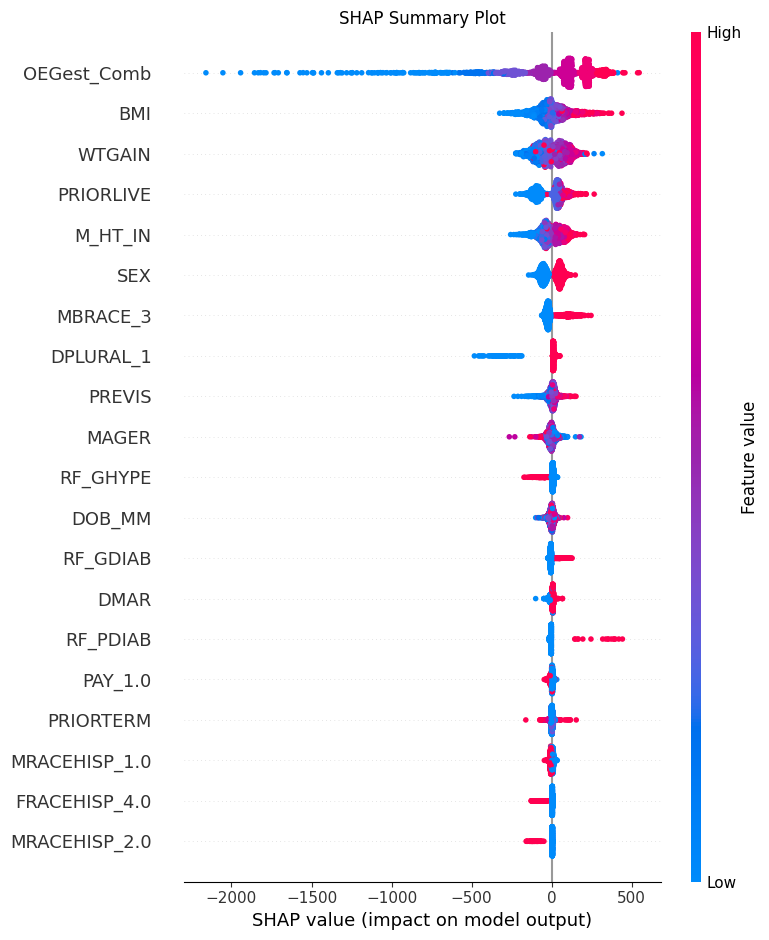

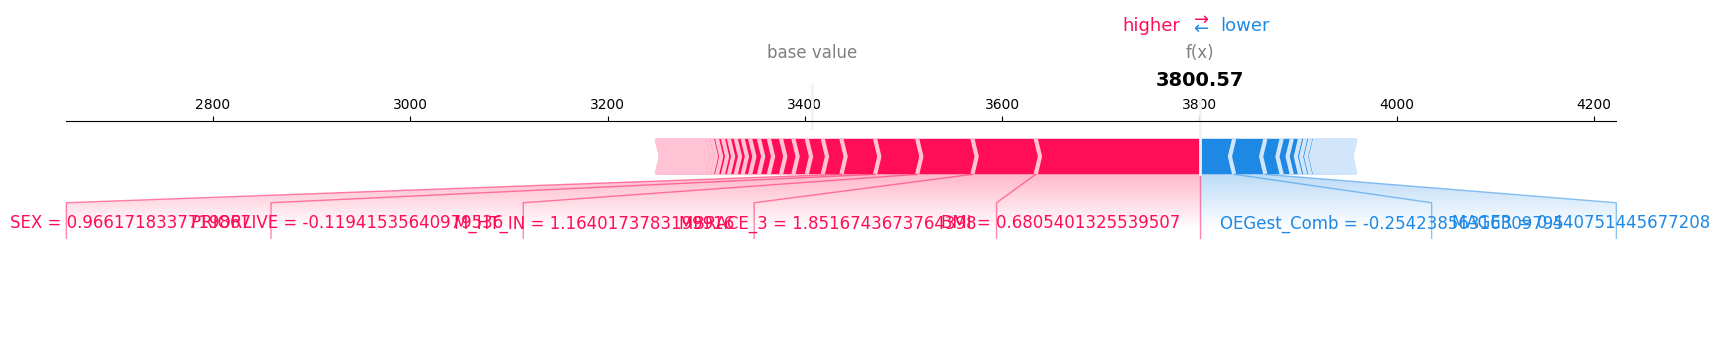

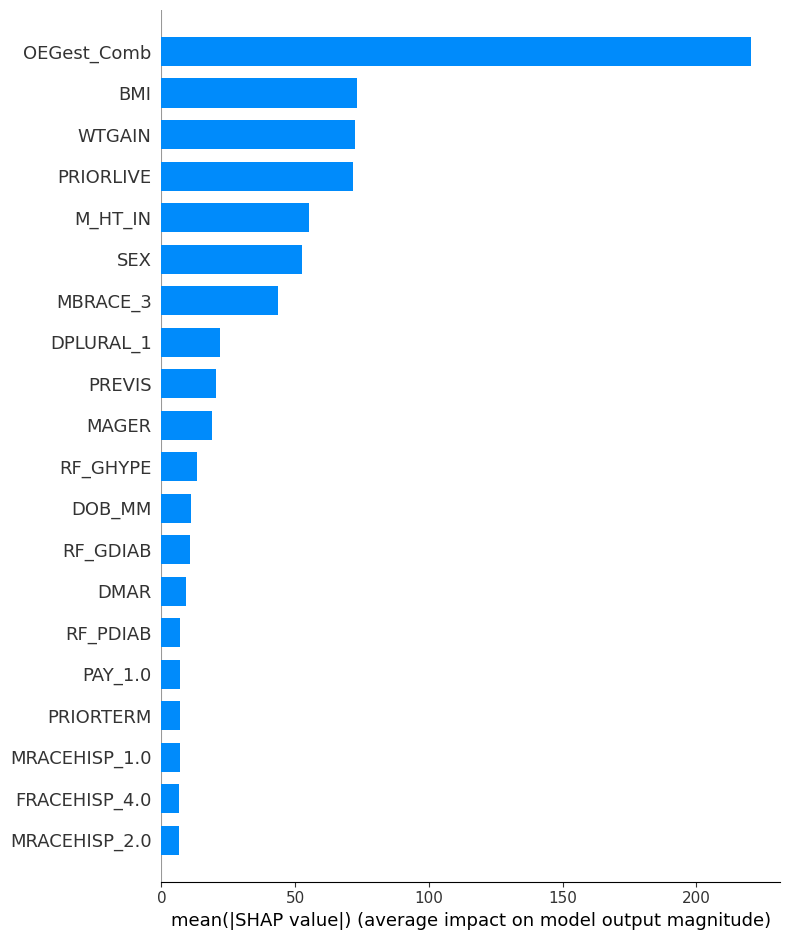

In [6]:
# Install shap if not already installed
import shap
import matplotlib.pyplot as plt

# === 1. 用训练好的 LightGBM 模型构造 SHAP 解释器 ===
explainer = shap.TreeExplainer(lgb_model)   # lgb_model 是你已经训练好的 LightGBM 模型
shap_values = explainer.shap_values(X_test) # X_test 是你的测试集 DataFrame

# === 2. 全局特征重要性可视化 ===
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# === 3. 单个样本解释 ===
# 比如看测试集第一个样本
sample_idx = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], 
                pd.DataFrame(X_test, columns=X.columns).iloc[sample_idx,:], matplotlib=True)

# === 4. 特征重要性条形图（全局平均绝对值） ===
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")


In [8]:
# <2500g 早产

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix

# === 读表 ===
df = pd.read_csv("/Users/muyuanchen/Desktop/NIH_research/nat2018_model_matrix_final.csv")

# === 1) y：把连续体重→二分类 (LBW < 2500g)
y = (df["DBWT"] < 2500).astype(int).values   # 1=低出生体重, 0=正常

# === 2) X：用你已有的 drop 列表，避免泄漏（和回归时一致）
drop_cols = [
    "DBWT","APGAR5R","APGAR10R","AB_NICU","AB_SURF","AB_ANTI","AB_SEIZ","NO_ABNORM",
    "CA_ANEN","CA_MNSB","CA_CCHD","CA_CDH","CA_OMPH","CA_GAST","CA_LIMB","CA_CLEFT",
    "CA_CLPAL","CA_DOWN","CA_DISOR","CA_HYPO","NO_CONGEN",
    "MM_MTR","MM_PLAC","MM_UHYST","MM_AICU","NO_MMORB","ILIVE",
    # 建议一并去掉的无临床/事后或冗余字段（如你前文决定）
    "DOB_TT","DOB_WK","DOB_MM","DOB_YY","COMBGEST","DLMP_MM","DLMP_YY",
    "LD_STER","LD_INDL","MRACEHISP_3.0","FRACEHISP_3.0"
]
X = df_ordered.drop(columns=drop_cols, errors="ignore").fillna(0)

# === 3) 划分数据（分层抽样）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4) 训练分类版的三大树模型
import lightgbm as lgb, xgboost as xgb
from catboost import CatBoostClassifier

# 类别不均衡辅助权重（若阳性占比较低）
pos = y_train.sum(); neg = len(y_train) - pos
scale_pos_weight = (neg / max(pos,1))

lgb_clf = lgb.LGBMClassifier(
    n_estimators=2000, learning_rate=0.03, num_leaves=63,
    subsample=0.8, colsample_bytree=0.8, random_state=42,
    is_unbalance=True
)
lgb_clf.fit(X_train, y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="auc",
            callbacks=[lgb.early_stopping(100, verbose=False)])

xgb_clf = xgb.XGBClassifier(
    n_estimators=2000, learning_rate=0.03, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, random_state=42,
    tree_method="hist", scale_pos_weight=scale_pos_weight,
    eval_metric="auc"
)
xgb_clf.fit(X_train, y_train,
            eval_set=[(X_test, y_test)],
            early_stopping_rounds=100, verbose=False)

cat_clf = CatBoostClassifier(
    iterations=2000, learning_rate=0.03, depth=6,
    loss_function="Logloss", random_seed=42, verbose=False,
    class_weights=[1.0, float(scale_pos_weight)]
)
cat_clf.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# === 5) 概率输出 + 简单平均融合
p_lgb = lgb_clf.predict_proba(X_test)[:,1]
p_xgb = xgb_clf.predict_proba(X_test)[:,1]
p_cat = cat_clf.predict_proba(X_test)[:,1]
p_ens = (p_lgb + p_xgb + p_cat) / 3.0

# === 6) 评估：ROC-AUC、PR-AUC、默认阈值0.5的指标
auc  = roc_auc_score(y_test, p_ens)
pr   = average_precision_score(y_test, p_ens)  # PR-AUC
y_hat = (p_ens >= 0.5).astype(int)
print(f"✅ LBW Ensemble  AUC={auc:.4f}  PR-AUC={pr:.4f}")
print(classification_report(y_test, y_hat, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_hat))

# === 7) （可选）按召回优先调阈值，例如阈值0.35
thr = 0.35
y_hat35 = (p_ens >= thr).astype(int)
print(f"\n— Threshold={thr} 时的报告 —")
print(classification_report(y_test, y_hat35, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_hat35))


[LightGBM] [Info] Number of positive: 455, number of negative: 7545
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 144
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.056875 -> initscore=-2.808343
[LightGBM] [Info] Start training from score -2.808343


/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


✅ LBW Ensemble  AUC=0.9521  PR-AUC=0.7101
              precision    recall  f1-score   support

           0     0.9839    0.9396    0.9612      1886
           1     0.4271    0.7456    0.5431       114

    accuracy                         0.9285      2000
   macro avg     0.7055    0.8426    0.7522      2000
weighted avg     0.9522    0.9285    0.9374      2000

Confusion matrix:
 [[1772  114]
 [  29   85]]

— Threshold=0.35 时的报告 —
              precision    recall  f1-score   support

           0     0.9901    0.9051    0.9457      1886
           1     0.3514    0.8509    0.4974       114

    accuracy                         0.9020      2000
   macro avg     0.6708    0.8780    0.7216      2000
weighted avg     0.9537    0.9020    0.9202      2000

Confusion matrix:
 [[1707  179]
 [  17   97]]
